In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data 

import seaborn as sns

### Use the iris database to answer the following quesitons

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### 1. What does the distribution of petal lengths look like?

In [4]:
# Select the column for petal lengths

iris['Petal.Length'].head()

1    1.4
2    1.4
3    1.3
4    1.5
5    1.4
Name: Petal.Length, dtype: float64

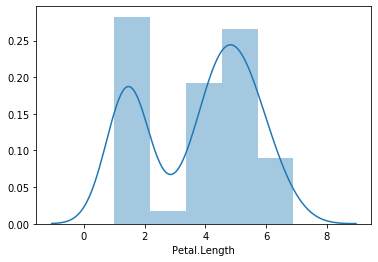

In [5]:
# Pass the column to sns.distplot()

sns.distplot(iris['Petal.Length'])

### 2. Is there a correlation between petal length and petal width?

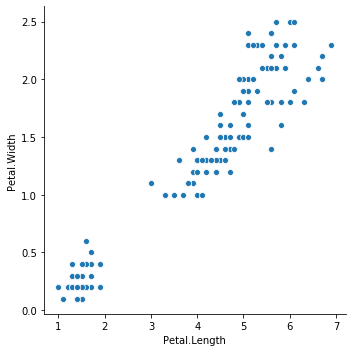

In [6]:
### scatterplot the two variables

sns.relplot(x='Petal.Length',y='Petal.Width', data=iris)

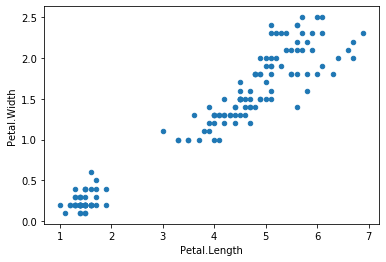

In [7]:
iris.plot(x='Petal.Length',y='Petal.Width',kind='scatter')

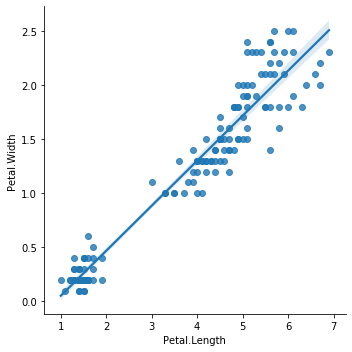

In [8]:
### The two variables have a strong linear correlation

sns.lmplot(x='Petal.Length',y='Petal.Width', data=iris)

### 3. Would it be reasonable to predict species based on sepal width and sepal length?

In [9]:
# How many species in the data frame? 

iris.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

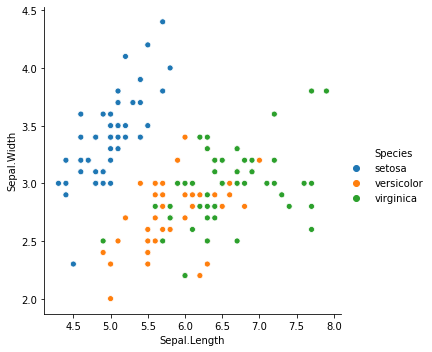

In [10]:
sns.relplot(x='Sepal.Length', y='Sepal.Width', hue='Species', data=iris)

In [11]:
### It is reasonable to predict based on both whether it is setosa or not. 

### 4. Which features would be best used to predict species?

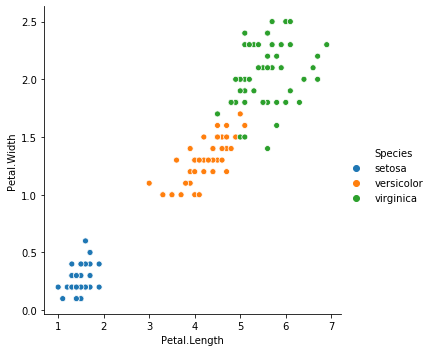

In [12]:
sns.relplot(x='Petal.Length', y='Petal.Width', hue='Species', data=iris)

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [13]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [14]:
anscombe.dataset.value_counts()

III    11
II     11
I      11
IV     11
Name: dataset, dtype: int64

In [15]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

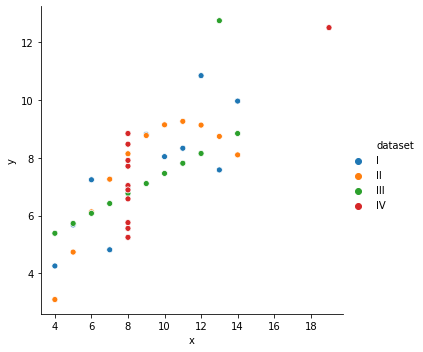

In [16]:
sns.relplot(x ='x', y='y', hue='dataset', data=anscombe)

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [17]:
insectsprays = data('InsectSprays')
insectsprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [18]:
insectsprays_doc = data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [19]:
insectsprays.groupby('spray').describe()

count                                                    
      count       mean       std  min    25%   50%    75%   max
spray                                                          
A      12.0  14.500000  4.719399  7.0  11.50  14.0  17.75  23.0
B      12.0  15.333333  4.271115  7.0  12.50  16.5  17.50  21.0
C      12.0   2.083333  1.975225  0.0   1.00   1.5   3.00   7.0
D      12.0   4.916667  2.503028  2.0   3.75   5.0   5.00  12.0
E      12.0   3.500000  1.732051  1.0   2.75   3.0   5.00   6.0
F      12.0  16.666667  6.213378  9.0  12.50  15.0  22.50  26.0

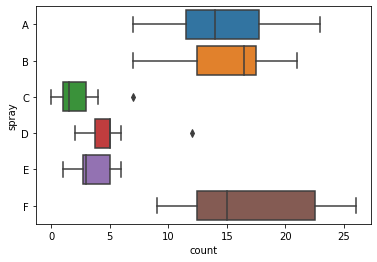

In [20]:
sns.boxplot(data=insectsprays, x = 'count', y = 'spray')

### 3.Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions

In [21]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [22]:
swiss.shape

(47, 6)

In [23]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


### 3-1. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [24]:
swiss_1 = swiss.assign(is_catholic = swiss.Catholic > 80)
swiss_1.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


### 3-2 Does whether or not a province is Catholic influence fertility?

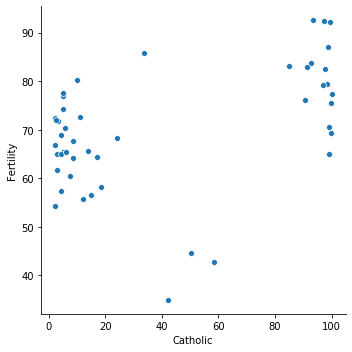

In [25]:
sns.relplot(x='Catholic', y='Fertility', data = swiss)

### 3-3 What measure correlations most strongly with fertility? 

In [26]:
swiss.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

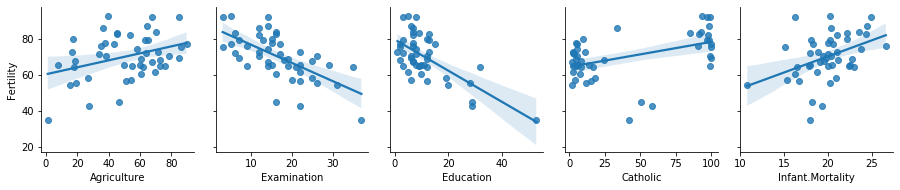

In [27]:
# y_axis 

sns.pairplot(swiss, y_vars = ['Fertility'],x_vars = ['Agriculture', 'Examination', 'Education', 'Catholic',
                                              'Infant.Mortality'], kind = 'reg')

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [28]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}'
      
query = 'show tables'

url_chipotle = f'mysql+pymysql://{user}:{password}@{host}/chipotle'
    
pd.read_sql(query, url_chipotle)

,Tables_in_chipotle
0,orders


In [29]:
query = 'select * from orders'
orders = pd.read_sql(query, url_chipotle)

orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [30]:
orders.item_price = orders.item_price.apply(lambda i: float(i[1:-1]))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [31]:
orders['total_item_price'] = orders.quantity * orders.item_price
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price,total_item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,33.96


In [32]:
most_pop_4 = orders.groupby('item_name').total_item_price.sum().nlargest(n=4, keep='all')
most_pop_4 

item_name
Chicken Bowl       8044.63
Chicken Burrito    6387.06
Steak Burrito      4236.13
Steak Bowl         2479.81
Name: total_item_price, dtype: float64

Text(0, 0.5, 'revenue')

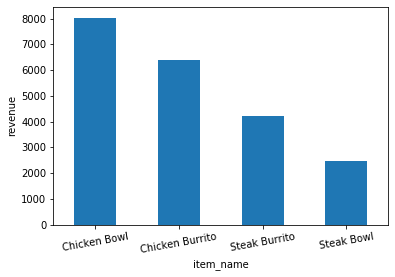

In [33]:
most_pop_4.plot(kind='bar')
plt.xticks(rotation = 10)
plt.ylabel('revenue')

### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [34]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [35]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [36]:
avg_change = sleepstudy.groupby('Days').Reaction.mean()
avg_change

Days
0    256.651806
1    264.495756
2    265.361900
3    282.992011
4    288.649422
5    308.518456
6    312.178256
7    318.750583
8    336.629506
9    350.851222
Name: Reaction, dtype: float64

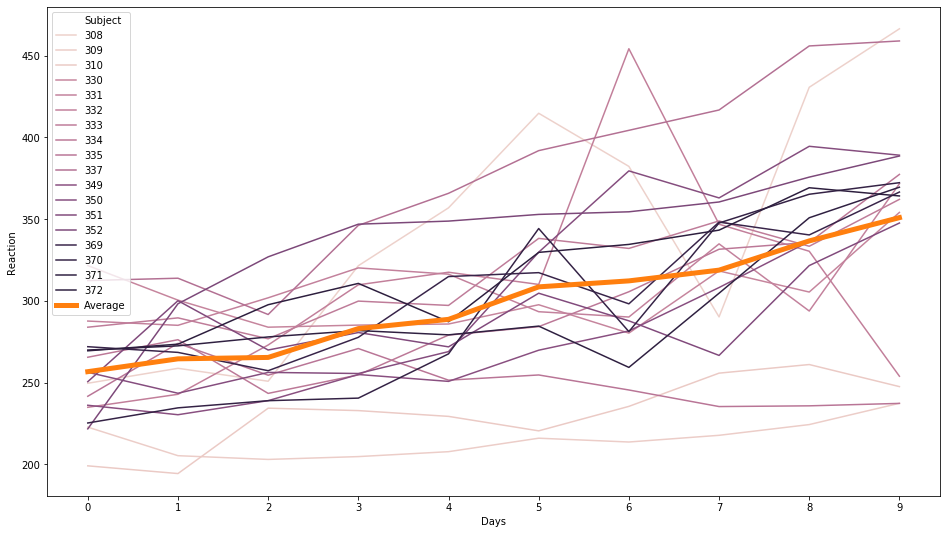

In [37]:
plt.figure(figsize = [16,9])
sns.lineplot(x='Days', y='Reaction', hue = 'Subject', data=sleepstudy, legend = 'full')
avg_change.plot(linewidth = 5, label = 'Average',xticks=range(0,10,1))
plt.legend()